<a href="https://colab.research.google.com/github/8johan/devoir/blob/main/minipooo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***INTRODUCTION ***

Exon–intron and intron–exon boundaries in genes are called splice sites, where the former one is donor splice site and the latter one is acceptor splice site [1]. In majority, the donor and acceptor splice sites are conserved with dimer GT and AG at the beginning and at the end of introns respectively [2]. Prediction of splice sites is vital for genome annotation because the accuracy of gene finding programs depend upon the correct identification of true splice sites [1, 3, 4]. However, the conserved GT/AG is not sufficient to locate the true splicing signal, due to the presence of large number of GT/AG di-nucleotides (false positive cases) in genes [1, 5].

# *METHODES*

Plusieurs méthodes de calcul ont été proposées pour la prédiction des sites d'épissage, et celles-ci peuvent être globalement classées en deux classes, à savoir l'approche probabiliste et l'approche basée sur l'apprentissage automatique [6]. En ce qui concerne la précision des prédictions, les approches d'apprentissage automatique sont plus efficaces que les approches probabilistes [1]. Dans les approches basées sur l'apprentissage automatique, les séquences de sites d'épissage sont d'abord transformées en vecteurs numériques avant d'être utilisées comme entrée dans les classificateurs

La génération de Feature et la sélection de Feature informatives jouent un rôle central en ce qui concerne les performances de classification de l'approche d'apprentissage automatique.

Lors du traitement de la séquence d'ADN, il est nécessaire de convertir la séquence de chaînes en une valeur numérique, de manière à former une formation de modèle d'entrée matricielle. De manière générale, il existe trois méthodes d'encodage de séquence : l'encodage séquentiel, l'encodage à chaud et l'encodage k-mer (Choong et Lee, 2017). Les caractéristiques des trois méthodes de codage de l'ADN sont présentées dans le tableau 1.

tableau 1.

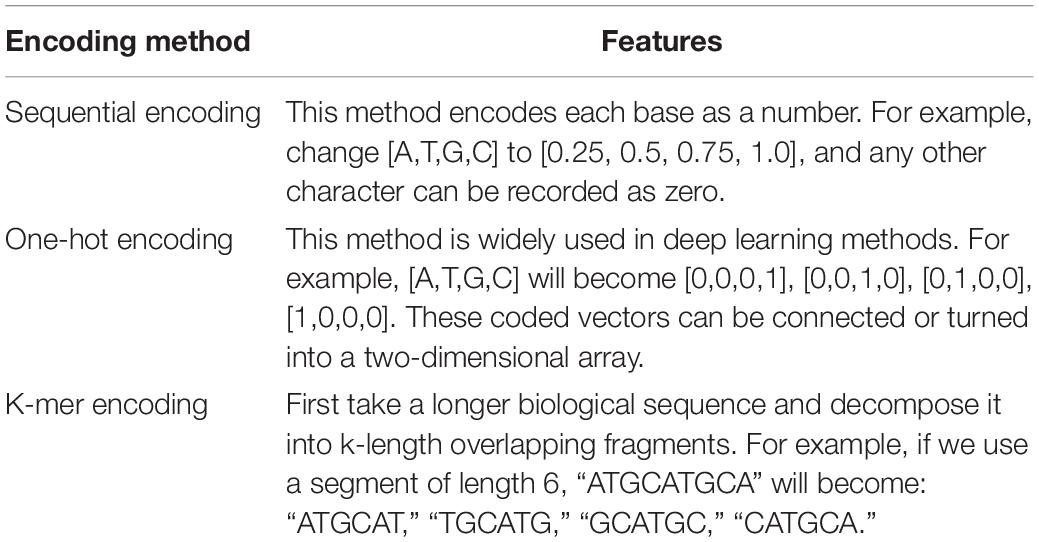

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sys 


IMPORT DU DATA

In [157]:
fname = '/content/splice (1).data'
with open(fname) as f:
    content = f.readlines()
content = [x.strip().split(',') for x in content]
for l in content:
    for i in range(len(l)):
        l[i] = l[i].strip()
raw_data = np.array(content)

In [158]:
raw_data

array([['EI', 'ATRINS-DONOR-521',
        'CCAGCTGCATCACAGGAGGCCAGCGAGCAGGTCTGTTCCAAGGGCCTTCGAGCCAGTCTG'],
       ['EI', 'ATRINS-DONOR-905',
        'AGACCCGCCGGGAGGCGGAGGACCTGCAGGGTGAGCCCCACCGCCCCTCCGTGCCCCCGC'],
       ['EI', 'BABAPOE-DONOR-30',
        'GAGGTGAAGGACGTCCTTCCCCAGGAGCCGGTGAGAAGCGCAGTCGGGGGCACGGGGATG'],
       ...,
       ['N', 'ORARGIT-NEG-241',
        'TCTCGGGGGCGGCCGGCGCGGCGGGGAGCGGTCCCCGGCCGCGGCCCCGACGTGTGTGTC'],
       ['N', 'TARHBB-NEG-541',
        'ATTCTACTTAGTAAACATAATTTCTTGTGCTAGATAACCAAATTAAGAAAACCAAAACAA'],
       ['N', 'TARHBD-NEG-1981',
        'AGGCTGCCTATCAGAAGGTGGTGGCTGGTGTGGCTGCTGCTCTGGCTCACAAGTACCATT']],
      dtype='<U60')

nous avons 3 colouns 

# *generation du datafram*

In [159]:
 column_names=['type', 'Donor', 'seq ']
x = pd.DataFrame(raw_data,columns = column_names)
x.head()


,type,Donor,seq
0,EI,ATRINS-DONOR-521,CCAGCTGCATCACAGGAGGCCAGCGAGCAGGTCTGTTCCAAGGGCC...
1,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGGTGAGCCCCACCGCCC...
2,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGGTGAGAAGCGCAGTCG...
3,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGTATGGGGCGGGGCTT...
4,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTGAGTGTCCCCATCC...


In [207]:
l=[0,0,0]
for i in range(len(x)):
  if(x['type'][i]=='N'):

    l[i]=l[i]+1
  if(x['type'][i]=='EI'):
    l[i]=l[i]+1
  if(x['type'][i]=='IE'):
     l[i]=l[i]+1


IndexError: ignored

In [205]:
st = x['type'].unique()
typ_frq = [0 for i in range (len(st))]
for j in range(len(x)):

    for i in range (len(st)):

        if x['type'][j]==st[i]:
          typ_frq[i]=stop_code_freq[i]+1


          
typ_frq

IndexError: ignored

# Feature extraction with 'sequential encoding'

partie codage

string_to_array va séparer les sequence en dans charachteres en miniscule  

In [160]:
import re
def string_to_array(seq_string):
   seq_string = seq_string.lower()
   seq_string = re.sub('[^acgt]', 'z', seq_string)
   seq_string = np.array(list(seq_string))
   return seq_string
# create a label encoder with 'acgtn' alphabet
from sklearn.preprocessing import LabelEncoder



nous avons défini la fonction ordinal_encodor et nous avons utulise le codeur labelEncoder()

LabelEncoder():
Encode target labels with value between 0 and n_classes-1.

This transformer should be used to encode target values, i.e. y, and not the input X.

puisque les fréquence du 'D' et 'R' et 'S' et 'N' sont faible nous avons les encoder par  la valeur 0

In [161]:
def ordinal_encoder(my_array):
   label_encoder = LabelEncoder()
   label_encoder.fit(np.array(['a','c','g','t','z']))
   integer_encoded = label_encoder.transform(my_array)
   float_encoded = integer_encoded.astype(float)
   float_encoded[float_encoded == 0] = 0.25 # A
   float_encoded[float_encoded == 1] = 0.25 # C
   float_encoded[float_encoded == 2] =0.75 # G
   float_encoded[float_encoded == 3] = 1 # T
   float_encoded[float_encoded == 4] = 0.00 # anything else, lets say n
   

   return float_encoded

In [162]:
l=[]
for i in range(3190):
  o=raw_data[i][2]
  u=ordinal_encoder(string_to_array(raw_data[i][2]))
  l.append(u)

In [163]:
u = pd.DataFrame(l)
r = pd.concat([x, u], axis=1)
r

,type,Donor,seq,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,EI,ATRINS-DONOR-521,CCAGCTGCATCACAGGAGGCCAGCGAGCAGGTCTGTTCCAAGGGCC...,0.25,0.25,0.25,0.75,0.25,1.00,0.75,0.25,0.25,1.00,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.25,0.75,0.25,0.75,0.25,0.75,0.25,0.25,0.75,0.75,1.00,0.25,1.00,0.75,1.00,1.00,0.25,0.25,0.25,0.25,0.75,0.75,0.75,0.25,0.25,1.00,1.00,0.25,0.75,0.25,0.75,0.25,0.25,0.25,0.75,1.00,0.25,1.00,0.75
1,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGGTGAGCCCCACCGCCC...,0.25,0.75,0.25,0.25,0.25,0.25,0.75,0.25,0.25,0.75,0.75,0.75,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.25,1.00,0.75,0.25,0.25,0.75,0.75,0.75,1.00,0.75,0.25,0.75,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.75,0.25,0.25,0.25,0.25,1.00,0.25,0.25,0.75,1.00,0.75,0.25,0.25,0.25,0.25,0.25,0.75,0.25
2,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGGTGAGAAGCGCAGTCG...,0.75,0.25,0.75,0.75,1.00,0.75,0.25,0.25,0.75,0.75,0.25,0.25,0.75,1.00,0.25,0.25,1.00,1.00,0.25,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.75,0.25,0.25,0.75,0.75,1.00,0.75,0.25,0.75,0.25,0.25,0.75,0.25,0.75,0.25,0.25,0.75,1.00,0.25,0.75,0.75,0.75,0.75,0.75,0.25,0.25,0.25,0.75,0.75,0.75,0.75,0.25,1.00,0.75
3,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGTATGGGGCGGGGCTT...,0.75,0.75,0.75,0.25,1.00,0.75,0.25,0.75,1.00,1.00,0.75,0.25,1.00,0.75,0.75,1.00,0.25,0.25,0.25,0.25,1.00,1.00,0.25,0.25,1.00,0.75,0.75,0.25,0.25,0.75,0.75,1.00,0.25,1.00,0.75,0.75,0.75,0.75,0.25,0.75,0.75,0.75,0.75,0.25,1.00,1.00,0.75,0.25,1.00,0.25,0.75,0.75,1.00,1.00,1.00,1.00,0.25,0.25,0.25,0.25
4,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTGAGTGTCCCCATCC...,0.75,0.25,1.00,0.25,0.25,0.75,0.25,0.25,0.25,0.25,0.25,0.25,0.75,0.75,1.00,0.25,0.25,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.25,0.25,1.00,0.75,0.25,0.25,0.75,1.00,0.75,0.25,0.75,1.00,0.75,1.00,0.25,0.25,0.25,0.25,0.25,1.00,0.25,0.25,0.25,0.75,0.75,0.25,0.25,0.25,1.00,1.00,0.75,0.25,0.25,0.25,0.25,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,N,ORAHBPSBD-NEG-2881,TCTCTTCCCTTCCCCTCTCTCTTTCTTTCTTTTCTCTCCTCTTCTC...,1.00,0.25,1.00,0.25,1.00,1.00,0.25,0.25,0.25,1.00,1.00,0.25,0.25,0.25,0.25,1.00,0.25,1.00,0.25,1.00,0.25,1.00,1.00,1.00,0.25,1.00,1.00,1.00,0.25,1.00,1.00,1.00,1.00,0.25,1.00,0.25,1.00,0.25,0.25,1.00,0.25,1.00,1.00,0.25,1.00,0.25,1.00,1.00,0.25,1.00,1.00,1.00,0.25,0.25,1.00,0.25,1.00,0.25,1.00,1.00
3186,N,ORAINVOL-NEG-2161,GAGCTCCCAGAGCAGCAAGAGGGCCAGCTGAAGCACCTGGAGAAGC...,0.75,0.25,0.75,0.25,1.00,0.25,0.25,0.25,0.25,0.75,0.25,0.75,0.25,0.25,0.75,0.25,0.25,0.25,0.75,0.25,0.75,0.75,0.75,0.25,0.25,0.25,0.75,0.25,1.00,0.75,0.25,0.25,0.75,0.25,0.25,0.25,0.25,1.00,0.75,0.75,0.25,0.75,0.25,0.25,0.75,0.25,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.25,0.25,0.75,0.25,1.00,0.75
3187,N,ORARGIT-NEG-241,TCTCGGGGGCGGCCGGCGCGGCGGGGAGCGGTCCCCGGCCGCGGCC...,1.00,0.25,1.00,0.25,0.75,0.75,0.75,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.75,0.75,0.25,0.75,0.25,0.75,0.75,0.25,0.75,0.75,0.75,0.75,0.25,0.75,0.25,0.75,0.75,1.00,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.25,0.75,0.25,0.75,0.75,0.25,0.25,0.25,0.25,0.75,0.25,0.25,0.75,1.00,0.75,1.00,0.75,1.00,0.75,1.00,0.25
3188,N,TARHBB-NEG-541,ATTCTACTTAGTAAACATAATTTCTTGTGCTAGATAACCAAATTAA...,0.25,1.00,1.00,0.25,1.00,0.25,0.25,1.00,1.00,0.25,0.75,1.00,0.25,0.25,0.25,0.25,0.25,1.00,0.25,0.25,1.00,1.00,1.00,0.25,1.00,1.00,0.75,1.00,0.75,0.25,1.00,0.25,0.75,0.25,1.00,0.25,0.25,0.25,0.25,0.25,0.25,0.25,1.00,1.00,0.25,0.25,0.75,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25


# elimination des variables non important 

In [164]:
r=r.drop('seq ',axis=1)
r=r.drop('Donor',axis=1)

In [165]:
r

,type,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,EI,0.25,0.25,0.25,0.75,0.25,1.00,0.75,0.25,0.25,1.00,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.25,0.75,0.25,0.75,0.25,0.75,0.25,0.25,0.75,0.75,1.00,0.25,1.00,0.75,1.00,1.00,0.25,0.25,0.25,0.25,0.75,0.75,0.75,0.25,0.25,1.00,1.00,0.25,0.75,0.25,0.75,0.25,0.25,0.25,0.75,1.00,0.25,1.00,0.75
1,EI,0.25,0.75,0.25,0.25,0.25,0.25,0.75,0.25,0.25,0.75,0.75,0.75,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.25,1.00,0.75,0.25,0.25,0.75,0.75,0.75,1.00,0.75,0.25,0.75,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.75,0.25,0.25,0.25,0.25,1.00,0.25,0.25,0.75,1.00,0.75,0.25,0.25,0.25,0.25,0.25,0.75,0.25
2,EI,0.75,0.25,0.75,0.75,1.00,0.75,0.25,0.25,0.75,0.75,0.25,0.25,0.75,1.00,0.25,0.25,1.00,1.00,0.25,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.75,0.25,0.25,0.75,0.75,1.00,0.75,0.25,0.75,0.25,0.25,0.75,0.25,0.75,0.25,0.25,0.75,1.00,0.25,0.75,0.75,0.75,0.75,0.75,0.25,0.25,0.25,0.75,0.75,0.75,0.75,0.25,1.00,0.75
3,EI,0.75,0.75,0.75,0.25,1.00,0.75,0.25,0.75,1.00,1.00,0.75,0.25,1.00,0.75,0.75,1.00,0.25,0.25,0.25,0.25,1.00,1.00,0.25,0.25,1.00,0.75,0.75,0.25,0.25,0.75,0.75,1.00,0.25,1.00,0.75,0.75,0.75,0.75,0.25,0.75,0.75,0.75,0.75,0.25,1.00,1.00,0.75,0.25,1.00,0.25,0.75,0.75,1.00,1.00,1.00,1.00,0.25,0.25,0.25,0.25
4,EI,0.75,0.25,1.00,0.25,0.25,0.75,0.25,0.25,0.25,0.25,0.25,0.25,0.75,0.75,1.00,0.25,0.25,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.25,0.25,1.00,0.75,0.25,0.25,0.75,1.00,0.75,0.25,0.75,1.00,0.75,1.00,0.25,0.25,0.25,0.25,0.25,1.00,0.25,0.25,0.25,0.75,0.75,0.25,0.25,0.25,1.00,1.00,0.75,0.25,0.25,0.25,0.25,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,N,1.00,0.25,1.00,0.25,1.00,1.00,0.25,0.25,0.25,1.00,1.00,0.25,0.25,0.25,0.25,1.00,0.25,1.00,0.25,1.00,0.25,1.00,1.00,1.00,0.25,1.00,1.00,1.00,0.25,1.00,1.00,1.00,1.00,0.25,1.00,0.25,1.00,0.25,0.25,1.00,0.25,1.00,1.00,0.25,1.00,0.25,1.00,1.00,0.25,1.00,1.00,1.00,0.25,0.25,1.00,0.25,1.00,0.25,1.00,1.00
3186,N,0.75,0.25,0.75,0.25,1.00,0.25,0.25,0.25,0.25,0.75,0.25,0.75,0.25,0.25,0.75,0.25,0.25,0.25,0.75,0.25,0.75,0.75,0.75,0.25,0.25,0.25,0.75,0.25,1.00,0.75,0.25,0.25,0.75,0.25,0.25,0.25,0.25,1.00,0.75,0.75,0.25,0.75,0.25,0.25,0.75,0.25,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.25,0.25,0.75,0.25,1.00,0.75
3187,N,1.00,0.25,1.00,0.25,0.75,0.75,0.75,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.75,0.75,0.25,0.75,0.25,0.75,0.75,0.25,0.75,0.75,0.75,0.75,0.25,0.75,0.25,0.75,0.75,1.00,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.25,0.75,0.25,0.75,0.75,0.25,0.25,0.25,0.25,0.75,0.25,0.25,0.75,1.00,0.75,1.00,0.75,1.00,0.75,1.00,0.25
3188,N,0.25,1.00,1.00,0.25,1.00,0.25,0.25,1.00,1.00,0.25,0.75,1.00,0.25,0.25,0.25,0.25,0.25,1.00,0.25,0.25,1.00,1.00,1.00,0.25,1.00,1.00,0.75,1.00,0.75,0.25,1.00,0.25,0.75,0.25,1.00,0.25,0.25,0.25,0.25,0.25,0.25,0.25,1.00,1.00,0.25,0.25,0.75,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25


In [166]:

o=r
o=o.drop('type',axis=1)

# **PCA**

puisque nous avont 60 variables et c'est imposible du visualiser notre data pour cela nous avons réduit sa dimension 

In [167]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(o)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

In [168]:
final=pd.concat([principalDf,r['type'] ], axis=1)

In [169]:
final

,PC1,PC2,type
0,0.135340,-0.381450,EI
1,0.633450,-0.116346,EI
2,-0.191679,-0.555709,EI
3,-0.782003,-0.189446,EI
4,0.683530,-0.726965,EI
...,...,...,...
3185,-0.927949,-0.448404,N
3186,0.577009,0.317550,N
3187,-0.257000,-0.281182,N
3188,0.296612,0.480121,N


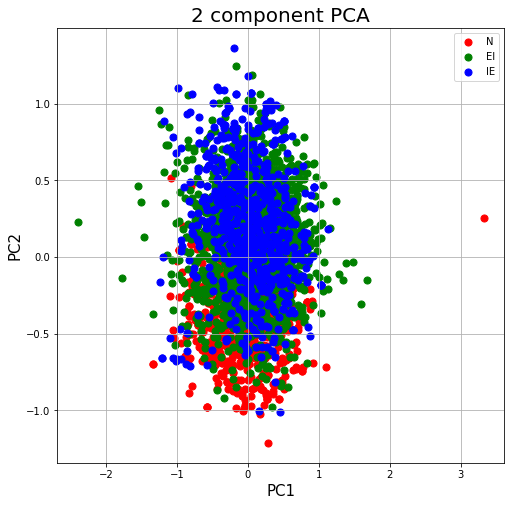

In [170]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['N', 'EI', 'IE']
colors = ['r', 'g', 'b']

indicesToKeep1 = final['type'] == 'EI'
indicesToKeep2 = final['type'] == 'N'
indicesToKeep3 = final['type'] == 'IE'

ax.scatter(final.loc[indicesToKeep1, 'PC1'], final.loc[indicesToKeep1, 'PC2'], c = 'r', s = 50)
ax.scatter(final.loc[indicesToKeep2, 'PC1'], final.loc[indicesToKeep2, 'PC2'], c = 'g', s = 50)
ax.scatter(final.loc[indicesToKeep3, 'PC1'], final.loc[indicesToKeep3, 'PC2'], c = 'b', s = 50)
ax.legend(targets)
ax.grid()

les donnés ne sont pas bien présenter car il ya 3190 individu 

on prend d'une maniére alératoire 319 

In [178]:
vis=final.sample(frac=0.1,random_state=20) 
vis

,PC1,PC2,type
270,-0.107980,-0.024976,1
398,-0.794247,-0.498614,1
1854,0.327478,-0.052402,0
2616,-0.222852,0.011037,0
1922,-0.208133,0.782766,0
...,...,...,...
421,-0.287385,-0.813571,1
2068,-0.293002,-0.217033,0
871,0.423962,0.541139,2
238,0.500328,0.074826,1


In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['N', 'EI', 'IE']
colors = ['r', 'g', 'b']

indicesToKeep1 = vis['type'] == 'EI'
indicesToKeep2 = vis['type'] == 'N'
indicesToKeep3 = vis['type'] == 'IE'

ax.scatter(vis.loc[indicesToKeep1, 'PC1'], vis.loc[indicesToKeep1, 'PC2'], c = 'r', s = 50)
ax.scatter(vis.loc[indicesToKeep2, 'PC1'], vis.loc[indicesToKeep2, 'PC2'], c = 'g', s = 50)
ax.scatter(vis.loc[indicesToKeep3, 'PC1'], vis.loc[indicesToKeep3, 'PC2'], c = 'b', s = 50)
ax.legend(targets)
ax.grid()

codage du label 

In [171]:
final['type']=final['type'].map({'EI':1,'N':0,'IE':2},na_action=None)

In [172]:
final

,PC1,PC2,type
0,0.135340,-0.381450,1
1,0.633450,-0.116346,1
2,-0.191679,-0.555709,1
3,-0.782003,-0.189446,1
4,0.683530,-0.726965,1
...,...,...,...
3185,-0.927949,-0.448404,0
3186,0.577009,0.317550,0
3187,-0.257000,-0.281182,0
3188,0.296612,0.480121,0


# train / test 

In [173]:
y=np.c_[final["type"]]
x=np.c_[final['PC1'],final['PC2']]


In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.3, random_state = 1)

# **clustring avec Kmean **

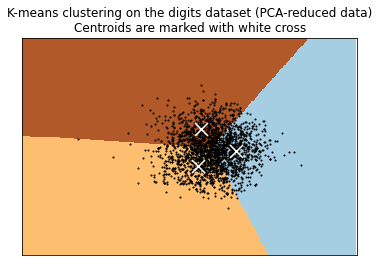

In [175]:
kmeans = KMeans(init="k-means++", n_clusters=3, n_init=4)
kmeans.fit(X_train)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(X_train[:, 0], X_train[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()





# ***clasiffication ***

## svm avec tout les kernel 

# train the model 

In [ ]:

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC , LinearSVC
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA

In [ ]:
C = 1.0  # SVM regularization parameter
svc = SVC(kernel='linear', C=C).fit(X_train, y_train)
rbf_svc = SVC(kernel='rbf', gamma=0.5, C=C).fit(X_train, y_train)
poly_svc = SVC(kernel='poly', degree=5, C=C).fit(X_train, y_train)
lin_svc = LinearSVC(C=C).fit(X_train, y_train)

In [179]:

y_pred1 = svc.predict(X_test)
y_pred2 =rbf_svc.predict(X_test)
y_pred3=poly_svc.predict(X_test)


# evaluation du modéle 

# svc

In [180]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.57      0.83      0.68       486
           1       0.57      0.62      0.59       234
           2       0.00      0.00      0.00       237

    accuracy                           0.57       957
   macro avg       0.38      0.48      0.42       957
weighted avg       0.43      0.57      0.49       957



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# RBF KERNEL

In [181]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.57      0.83      0.68       486
           1       0.58      0.61      0.59       234
           2       0.00      0.00      0.00       237

    accuracy                           0.57       957
   macro avg       0.38      0.48      0.42       957
weighted avg       0.43      0.57      0.49       957



POLY KERNEL

In [182]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.54      0.94      0.68       486
           1       0.67      0.26      0.38       234
           2       0.67      0.03      0.05       237

    accuracy                           0.55       957
   macro avg       0.62      0.41      0.37       957
weighted avg       0.60      0.55      0.45       957



# VISUALISATION DU DATA APRES CLASSIFICATION PAR SVM 

In [147]:
h = .02 
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

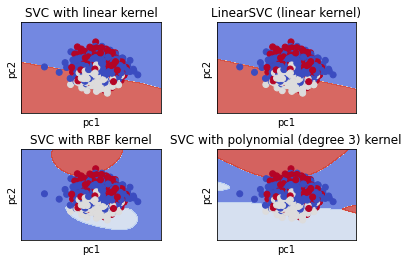

In [148]:


# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(1, 1, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.xlabel('pc1')
    plt.ylabel('pc2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

CLASIFICATION AVEC LOGISTIC REGRESION 

In [149]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', C=10**7).fit(X_train, y_train)
w_star = clf.coef_[0]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


evaluation 

In [184]:
y_pred=clf.predict(X_test )
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.59      0.55       486
           1       0.43      0.32      0.36       234
           2       0.27      0.26      0.27       237

    accuracy                           0.44       957
   macro avg       0.40      0.39      0.39       957
weighted avg       0.43      0.44      0.43       957



# visualisation 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


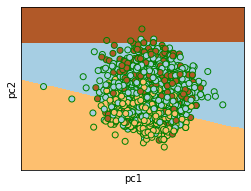

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets



# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="g", cmap=plt.cm.Paired)
plt.xlabel("pc1")
plt.ylabel("pc2")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

# classification avec random foresst et dession tres

In [151]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

# DecisionTreeClassifier

In [185]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.59      0.55       486
           1       0.43      0.32      0.36       234
           2       0.27      0.26      0.27       237

    accuracy                           0.44       957
   macro avg       0.40      0.39      0.39       957
weighted avg       0.43      0.44      0.43       957



# RandomForestClassifier

In [186]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)

print(classification_report(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


              precision    recall  f1-score   support

           0       0.59      0.79      0.68       486
           1       0.57      0.65      0.61       234
           2       0.67      0.12      0.20       237

    accuracy                           0.59       957
   macro avg       0.61      0.52      0.49       957
weighted avg       0.60      0.59      0.54       957



# Decision surface of a decision tree

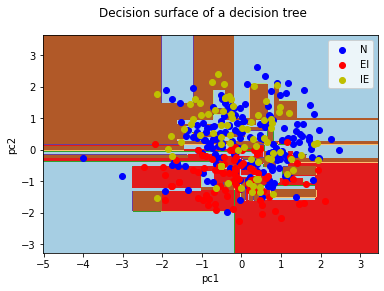

In [192]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02
vus=final.sample(frac=0.15,random_state=20) 
y=np.c_[vus["type"]]
x=np.c_[vus['PC1'],vus['PC2']]

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.3, random_state = 1)



for pairidx, pair in enumerate([[0, 1]]):
    # We only take the two corresponding features
    X = X_train
    y = y_train 

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(1, 1, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel('pc1')
    plt.ylabel('pc2')
    plt.axis("tight")
    targetss=['N','EI','IE']

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=targetss[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree ")
plt.legend()
plt.show()

on peux remarquer que notre arbre esr fait une bon classification pour le class 'EI'

In [194]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(o)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3','PC4','PC5'])
arb=final=pd.concat([principalDf,r['type'] ], axis=1)
arb

,PC1,PC2,PC3,PC4,PC5,type
0,0.162709,-0.456895,0.240133,-0.026223,0.340841,EI
1,0.650860,-0.060445,0.371807,-0.095770,-0.107920,EI
2,-0.174703,-0.584875,0.060571,0.007804,-0.072039,EI
3,-0.796888,-0.167652,-0.186394,0.269783,-0.303675,EI
4,0.668987,-0.679880,-0.234440,0.102612,0.429025,EI
...,...,...,...,...,...,...
3185,-0.920141,-0.466399,0.465699,0.179979,-0.013734,N
3186,0.576492,0.360888,-0.126986,0.632615,0.299079,N
3187,-0.277125,-0.174280,0.197602,0.284851,-0.922508,N
3188,0.284509,0.533768,0.056288,0.364295,0.110935,N


In [200]:
arb['type']=arb['type'].map({'EI':1,'N':0,'IE':2},na_action=None)

In [201]:
y=np.c_[arb["type"]]
x=np.c_[arb['PC1'],arb['PC2'],arb['PC3'],arb['PC4'],arb['PC5']]

In [202]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.3, random_state = 1)

In [203]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.79      0.68       486
           1       0.57      0.65      0.61       234
           2       0.67      0.12      0.20       237

    accuracy                           0.59       957
   macro avg       0.61      0.52      0.49       957
weighted avg       0.60      0.59      0.54       957



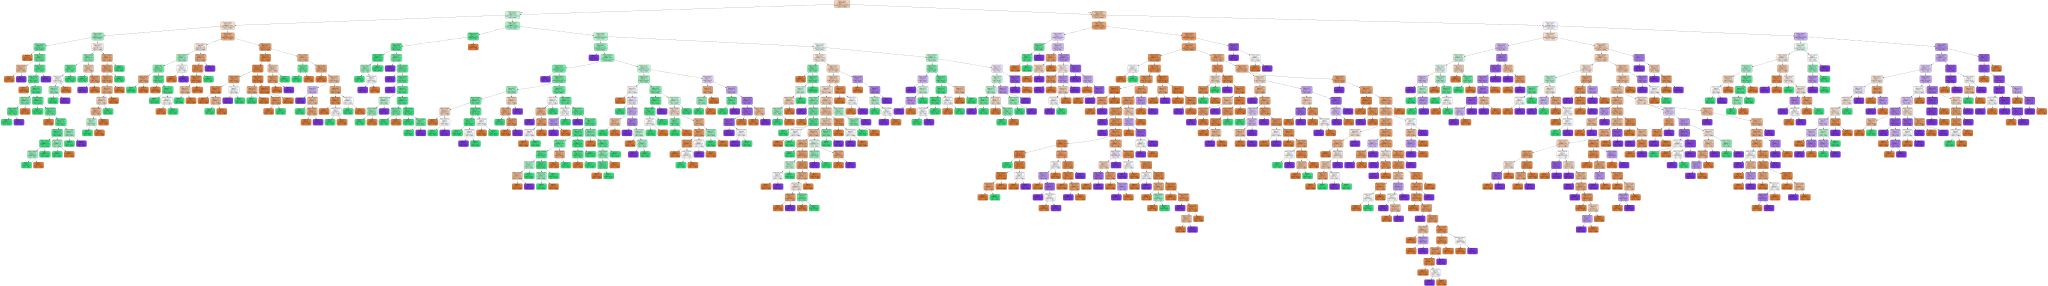

In [208]:
from graphviz import Source
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
        tree_clf,
        out_file=None, 
        feature_names=["PC1", "PC2",'PC3','PC4','PC5'],
        class_names=["yellow", "blue",'red','green','black '],
        rounded=True,
        filled=True
    )
graph = Source(dot_data)  
graph